# Homework 1: Python intro and simple statistics

### Computing the mean and standard deviation

In [176]:
from typing import Iterable, Union
from math import sqrt, isclose

def mean(data: Iterable[Union[int, float]]) -> float:
    return sum(data) / len(data)

def std(data: Iterable[Union[int, float]]) -> float:
    m = mean(data)
    return sqrt(sum([(item - m) ** 2 for item in data]) / len(data))

In [177]:
from scipy.stats import norm
import numpy as np

random_set: np.ndarray = norm.rvs(size=1000)

assert(isclose(random_set.mean(), mean(random_set)))
assert(isclose(random_set.std(), std(random_set)))

### Plot histogram of randomly generated samples

(array([ 1.,  1.,  0.,  2.,  2.,  3.,  1.,  3.,  3.,  1.,  1.,  4.,  9.,
         3.,  5.,  9.,  8.,  8.,  5.,  9.,  7., 15.,  8.,  8., 13., 14.,
        15., 21.,  8., 14., 17., 21., 20., 25., 21., 33., 29., 20., 19.,
        18., 25., 24., 20., 30., 27., 20., 17., 21., 23., 28., 19., 16.,
        15., 26., 13., 16., 19., 14., 18., 22., 14., 15.,  8., 13., 12.,
         8., 11.,  8., 13., 11.,  2.,  5.,  4.,  4.,  4.,  3.,  5.,  2.,
         4.,  2.,  4.,  1.,  1.,  1.,  0.,  2.,  0.,  1.,  2.,  1.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-2.71896817, -2.65639354, -2.59381891, -2.53124428, -2.46866964,
        -2.40609501, -2.34352038, -2.28094575, -2.21837111, -2.15579648,
        -2.09322185, -2.03064722, -1.96807258, -1.90549795, -1.84292332,
        -1.78034869, -1.71777406, -1.65519942, -1.59262479, -1.53005016,
        -1.46747553, -1.40490089, -1.34232626, -1.27975163, -1.217177  ,
        -1.15460236, -1.09202773, -1.0294531 , -0.96687847, -0.904303

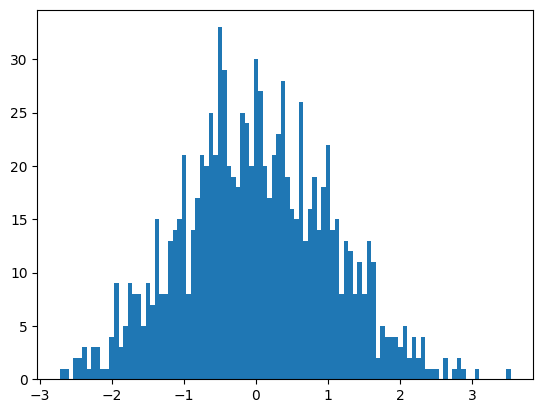

In [178]:
import matplotlib.pyplot as plt

plt.hist(random_set, bins=100)

In [179]:
import pandas as pd

df = pd.read_csv('data/2024-PM2.5.csv')
df.rename(columns={"Unnamed: 0": "Date"}, inplace=True)
dict(df.isna().sum())
df.drop(0, inplace=True)
df.drop(1, inplace=True)
df = df[df['P2'].notnull()]

df = df[["Date", "P2"]]
df.Date = pd.to_datetime(df.Date)
df.P2 = df.P2.apply(pd.to_numeric)

### Plot the readings from the P2 (Price) station

Text(0.5, 1.0, '2024 hourly PM2.5 at Price Station')

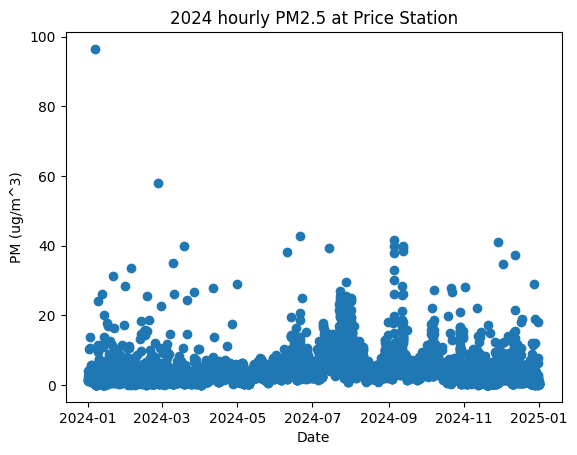

In [180]:
plt.scatter(df.Date, df.P2)
plt.xlabel('Date')
plt.ylabel('PM (ug/m^3)')
plt.title('2024 hourly PM2.5 at Price Station')

### Plot the mean pm2.5 for each month

Text(0.5, 1.0, 'Monthly average PM2.5 at Price Station')

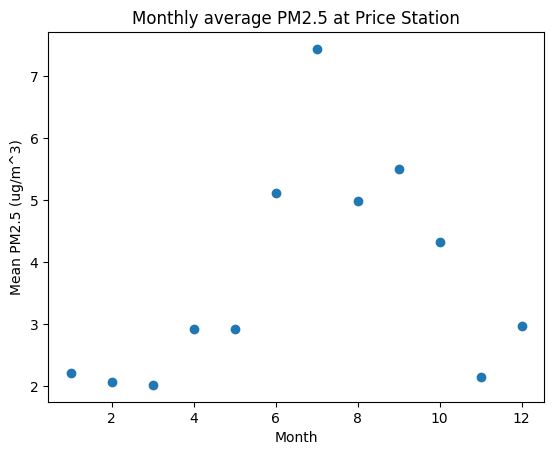

In [181]:
df['month'] = df['Date'].dt.month
monthly = df.groupby(['month'])['P2'].mean()

plt.scatter(monthly.index, monthly)
plt.xlabel('Month')
plt.ylabel('Mean PM2.5 (ug/m^3)')
plt.title('Monthly average PM2.5 at Price Station')

### Monthly insights

* There is a large increase in PM2.5 concentration during the summer months
* The summer months seems to show the most variance
* Fall seems to be have higher concentrations that spring, suggesting other factors other than temperature are involved





### Group data by hour

Text(0.5, 1.0, 'Hourly average PM2.5 at Price Station')

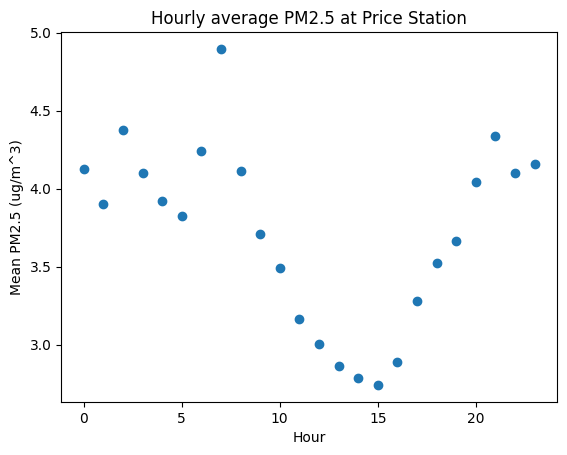

In [182]:
df['hour'] = df['Date'].dt.hour
hourly = df.groupby(['hour'])['P2'].mean()

plt.scatter(hourly.index, hourly)
plt.xlabel('Hour')
plt.ylabel('Mean PM2.5 (ug/m^3)')
plt.title('Hourly average PM2.5 at Price Station')

### Insights from hourly data
* The lowest concentrations seem to coincide with when people are generally active during the day
* There is a higher variation in concentrations starting at midnight until about 6AM

### Monthly and hours box and whisker


Text(0, 0.5, 'Mean PM2.5 (ug/m^3)')

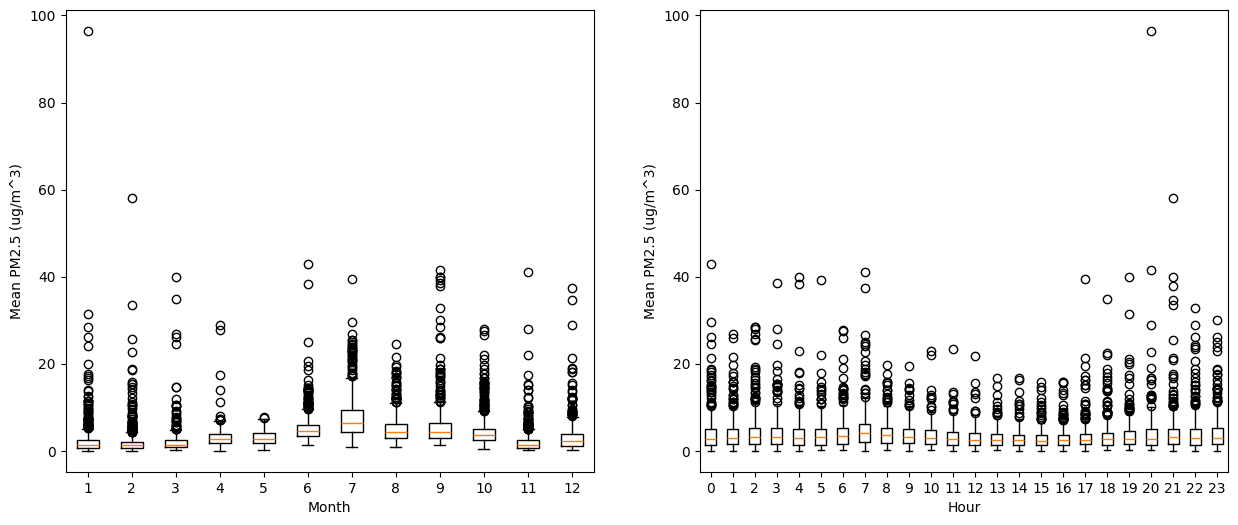

In [191]:
monthly_agg = df.groupby('month')['P2'].agg(lambda x: list(x))
hourly_agg = df.groupby('hour')['P2'].agg(lambda x: list(x))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
axs[0].boxplot(monthly_agg.tolist(), tick_labels=monthly_agg.index)
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Mean PM2.5 (ug/m^3)')
axs[1].boxplot(hourly_agg.tolist(), tick_labels=hourly_agg.index)
axs[1].set_xlabel('Hour')
axs[1].set_ylabel('Mean PM2.5 (ug/m^3)')

### Box and whisker insights
* Like we saw previously, the monthly plot shows and increase in average concentration in the summer months. However, this plot is now showing the spread amongst each month's outliers is fairly consistent across all months except for may. This is suggesting season agnostic factors which spike the concentration.
* The hourly plot is now showing that the 15th and 16th hours have the lowest max quartile, and the 7th hour has the highest.
* The hourly average is fairly consistent across hours when considering the total spread of the data. The previous chart's scale zoomed in on the variation within the averages, but the full spread overshadows the change amongst averages. This suggests a fairly consistent concentration for any given hour across the year, further supporting the existence of season agnostic factors which spike concentrations.